# GARCH(1,1) Model

In [4]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from arch import arch_model

<font size = '6'>Model specification</font>

In [6]:
# Loading data
sp_data = pd.read_csv(r"C:\Users\obien\OneDrive\Desktop\Portfolio_2023\Data\Stocks\SP500.csv")

In [7]:
basic_gm = arch_model(sp_data['Return'], p = 1, q = 1,
mean = 'constant', vol = 'GARCH', dist = 'normal')

<font size='6'>Validation of Model Assumptions</font>

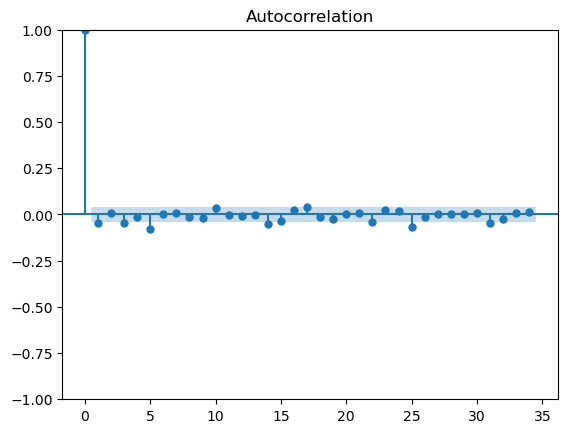

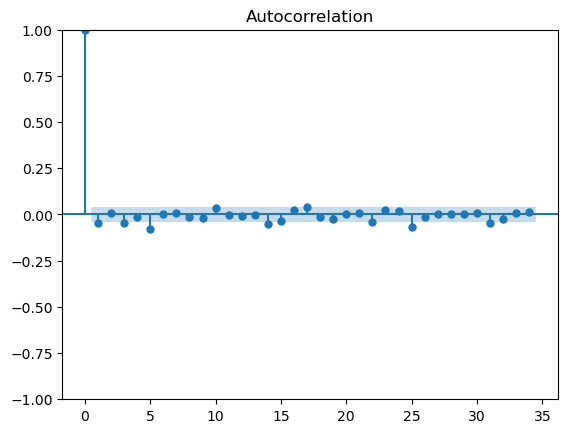

In [24]:
# Detect Autocorrelation
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(sp_data['Return'], alpha = 0.05)

In [25]:
# AIC vs BIC
print(gm_result.aic)
print(gm_result.bic)

5551.927656492914
5574.9524378687065


<font size='6'>Model Fitting</font>

In [12]:
gm_model = arch_model(sp_data['Return'])
gm_result = gm_model.fit(update_freq = 4)

Iteration:      4,   Func. Count:     31,   Neg. LLF: 3733.82264970074
Iteration:      8,   Func. Count:     54,   Neg. LLF: 2771.9655476147905
Iteration:     12,   Func. Count:     73,   Neg. LLF: 2771.9638282472106
Optimization terminated successfully    (Exit mode 0)
            Current function value: 2771.963828246457
            Iterations: 12
            Function evaluations: 73
            Gradient evaluations: 12


In [13]:
gm_result = gm_model.fit(disp = 'off')

<font size = '4'>Fitted results: parameters</font>

In [15]:
print(gm_result.params)

mu          0.077239
omega       0.039587
alpha[1]    0.167963
beta[1]     0.786467
Name: params, dtype: float64


<font size = '4'>Fitted results: summary</font>

In [16]:
print(gm_result.summary())

                     Constant Mean - GARCH Model Results                      
Dep. Variable:                 Return   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -2771.96
Distribution:                  Normal   AIC:                           5551.93
Method:            Maximum Likelihood   BIC:                           5574.95
                                        No. Observations:                 2336
Date:                Sun, Jan 08 2023   Df Residuals:                     2335
Time:                        22:13:57   Df Model:                            1
                                Mean Model                                
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu             0.0772  1.445e-02      5.345  9.031e-08 [4.892e-0

<font size = '4'>Fitted results: plots</font>

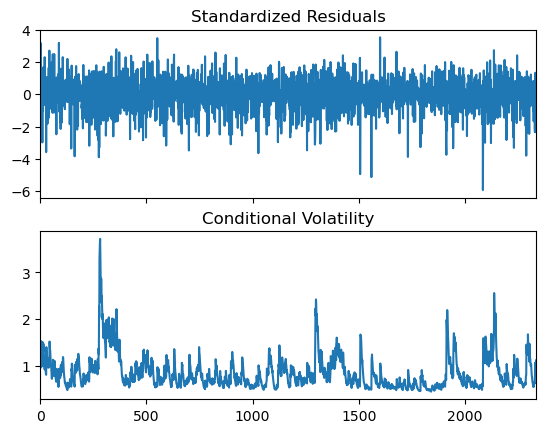

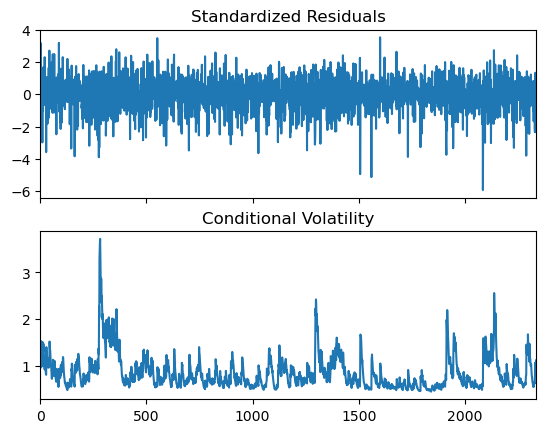

In [19]:
gm_result.plot()

<font size='6'>Model forecasting</font>

In [20]:
# Make 5-period ahead forecast
gm_forecast = gm_result.forecast(horizon = 5)

C:\Users\obien\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(


In [21]:
# Print out the last row of variance forecast
print(gm_forecast.variance[-1:])

           h.1       h.2       h.3       h.4       h.5
2335  0.994079  0.988366  0.982913  0.977708  0.972741
